In [155]:
from matplotlib import pyplot as plt
import pandas as np
import random
import numpy as np

In [156]:
nodes = []
random.random()
main_nodes = dict()

main_node_connected_to_central = dict()
connected_main_nodes = []
main_nodes = dict()
nodes_hash = dict()
# main_node = dict()
xs = [x[0] for x in nodes]
ys = [y[1] for y in nodes]
edge_list_per_cluster = dict()
central_node = (0, 0)
edges_between_nodes_in_different_clusters = []
k = 5
i = 0
spaceSize = 100
bounds_xs = np.linspace(-spaceSize, spaceSize, k)
bounds_ys = np.linspace(-spaceSize, spaceSize, k)
bounds_xs

array([-100.,  -50.,    0.,   50.,  100.])

In [157]:
def euclid(t1, t2):
    import math
    return math.sqrt((t1[0] - t2[0])**2 + (t1[1] - t2[1])**2)

In [158]:
def inSameCluster(t1, t2, bounds_xs, i, bounds_ys, j, k):
    try:
        if t1[0] >= bounds_xs[i] and t2[0] >= bounds_xs[i] and t1[0] < bounds_xs[i +1]and t2[0] < bounds_xs[i+1] : 
            if t1[1] >= bounds_ys[j] and t2[1] >= bounds_ys[j] and t1[1] < bounds_ys[j+1] and t2[1] < bounds_ys[j+1]:
                return True
        return False
    except:
        return True

In [159]:
def draw_main_nodes(main_nodes : dict):
    for node in main_nodes.values():
        plt.scatter([node[0]], [node[1]], color = "red", s = 100)

In [160]:
def number_of_main_nodes_not_connected_to_central(main_nodes):
    counter = 0 
    for node in main_nodes.values():
        if main_node_connected_to_central[node] == False:
            counter +=1
            
    return counter > 0 

In [161]:
def draw_edges_for_current_cluster(list_edge):
    for edge in list_edge:
        plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color = "green", lw = 0.5)
        plt.scatter([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color = "red")        

In [162]:
def draw_edges(edge_list):
    for key in edge_list.keys():
#         print(edge_list[i])
#         i = edge_list[j]
        
        draw_edges_for_current_cluster(edge_list[key])
#         plt.plot([i[0][0], i[1][0]], [i[1][0], i[1][1]])

In [163]:
def draw_graph():
    for i_0 in range(len(bounds_xs)):
        for j_0 in range(len(bounds_ys)):
            plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min(bounds_ys), max(bounds_xs)], color ="green", dashes = [1])
            plt.plot([min(bounds_xs), max(bounds_xs)], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])



In [164]:
def connect_main_nodes(main_nodes : dict):
    for node in main_nodes.values():
        neighbour = find_closest_neighbour(node, main_nodes.values())
        connected_main_nodes.append((node, neighbour))
    return connected_main_nodes

In [165]:
# for x in connect_main_nodes(main_nodes):
#     if x[1] != None:
#         plt.plot([x[0][0], x[1][0]], [x[0][1], x[1][1]])
#         plt.scatter([x[0][0], x[1][0]], [x[0][1], x[1][1]])

In [166]:
def init_main_nodes_connected_to_central():
    for node in main_nodes.values():
        main_node_connected_to_central[node] = False
    

In [167]:
def find_closest_node_to_central(main_nodes):
    max_dist = float('inf')
    closest_node = None
    for node in main_nodes.values():
        if euclid(node, central_node) < max_dist and main_node_connected_to_central[node] == False:
            max_dist = euclid(node, central_node)
            closest_node = node
    
    return closest_node

In [168]:
def flag_main_nodes_as_true_recursively():
    pass

In [169]:
(1,2) not in [(1,3),(2,3)]

True

In [170]:
def find_closest_neighbour(current_node, other_nodes):
    min_dist = float('inf')
    closest = None
    for tmp_node in other_nodes:
        if current_node != tmp_node and ((tmp_node, current_node) not in connected_main_nodes) and ((current_node, tmp_node) not in connected_main_nodes):
            if euclid(current_node, tmp_node) < min_dist:
                min_dist = euclid(current_node, tmp_node)
                closest = tmp_node
    return closest

In [171]:
def find_max_node(hash_map_of_nodes : dict):
    return sorted(hash_map_of_nodes, key = lambda x: hash_map_of_nodes[x], reverse = True)[0]

In [172]:
def make_unique_list_from_tuples(list_of_tuples):
    unique = []
    for x in list_of_tuples:
        unique.append(x[0])
        unique.append(x[1])
#     print(unique)
#     print([unique.count(x) for x in unique])
    return(unique)

In [173]:
def count_for_every_node_in_cluster(unique_list):
    hash_map = dict()
    for x in unique_list:
        hash_map[x] = unique_list.count(x)
#     print(hash_map)
    return hash_map

In [174]:
def recursively_set_other_nodes_as_connected_to_central(closest_node, main_node_connected_to_central, connected_main_nodes):
    for pair_of_nodes in connected_main_nodes:
        if (closest_node == pair_of_nodes[0] and main_node_connected_to_central[pair_of_nodes[1]] == False) or (closest_node == pair_of_nodes[1] and main_node_connected_to_central[pair_of_nodes[0]] == False):
            # print("chaning_hash map for {}".format(pair_of_nodes))
            if closest_node == pair_of_nodes[0]:
                main_node_connected_to_central[pair_of_nodes[1]] = True
                recursively_set_other_nodes_as_connected_to_central(pair_of_nodes[1], main_node_connected_to_central, connected_main_nodes)
            else:
                main_node_connected_to_central[pair_of_nodes[0]] = True
                recursively_set_other_nodes_as_connected_to_central(pair_of_nodes[0], main_node_connected_to_central, connected_main_nodes)
                


In [175]:
def calculateNumOfEdges():
    counter = 0
    for cluster in edge_list_per_cluster.keys():
        counter += len(edge_list_per_cluster[cluster])
    return counter

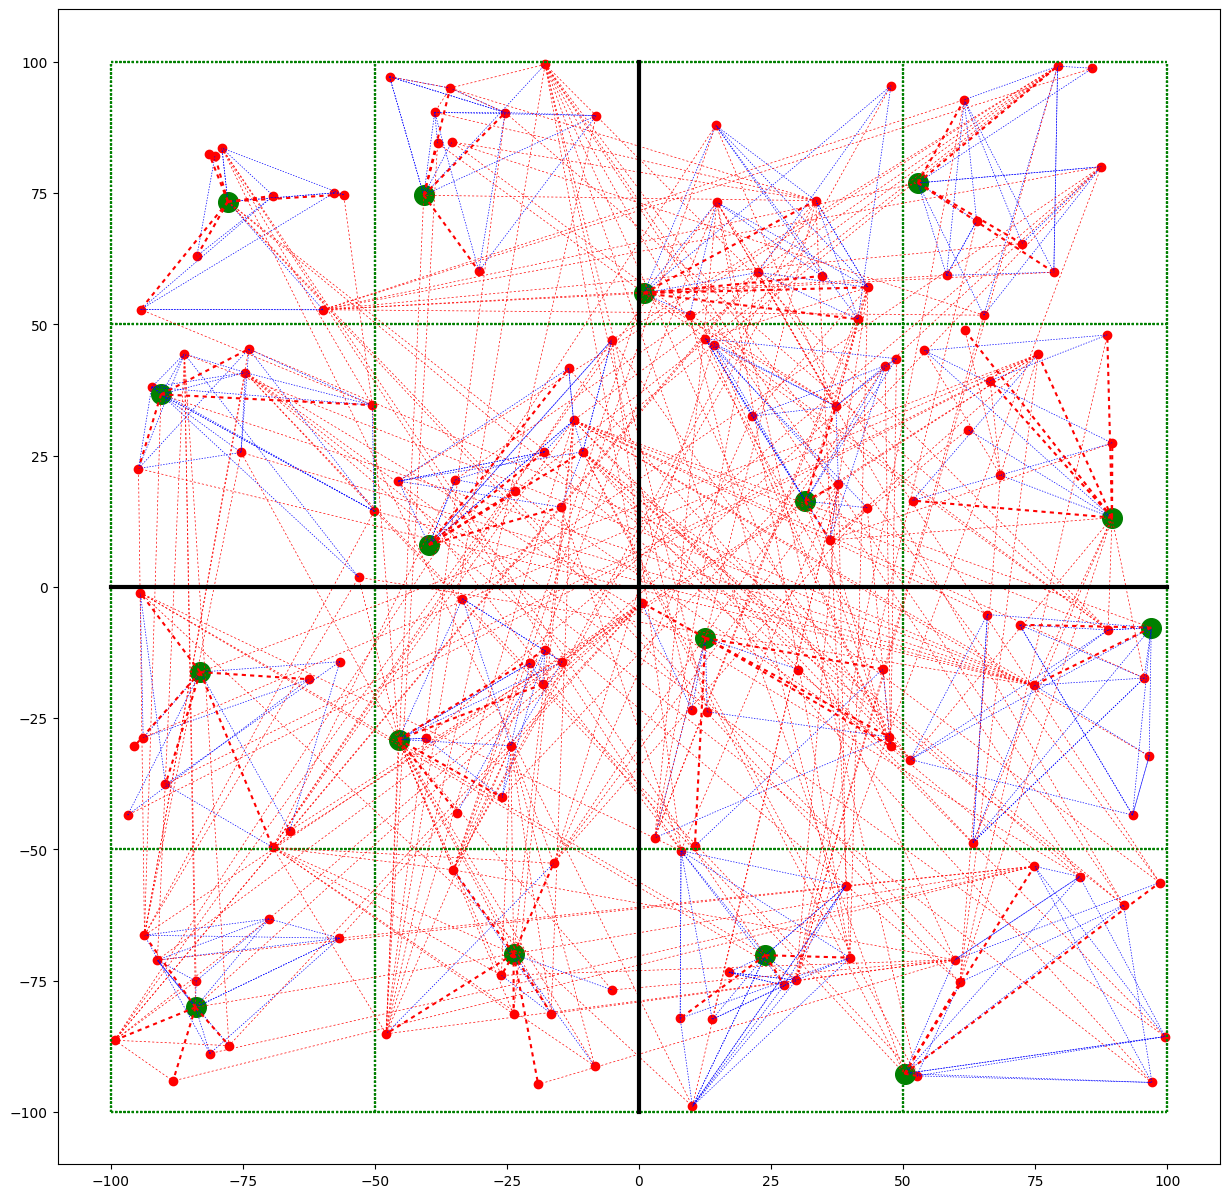

In [176]:

plt.figure(figsize=(15, 15))
for i_0 in range(len(bounds_xs)):
    for j_0 in range(len(bounds_ys)):
        plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min(bounds_ys), max(bounds_xs)], color ="green", dashes = [1])
        plt.plot([min(bounds_xs), max(bounds_xs)], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])



for i_0 in range(1,len(bounds_xs)):
    for j_0 in range(1,len(bounds_ys)):
        # plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min_ys - 2, max_ys +2], color ="green", dashes = [1])
        # plt.plot([min_xs - 2, max_xs + 2], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])
        list_of_nodes_in_current_cluster = []
        for _ in range(10):
            node = (random.uniform(bounds_xs[i_0-1], bounds_xs[i_0]), random.uniform(bounds_ys[j_0-1], bounds_ys[j_0]))
            plt.scatter([node[0]],[node[1]], color = "red")
            list_of_nodes_in_current_cluster.append(node)
        nodes_hash["cluster_{}_{}".format(i_0, j_0)] = list_of_nodes_in_current_cluster
        edges_for_current_cluster = []
        for i in range(len(nodes_hash["cluster_{}_{}".format(i_0, j_0)])):
            for j in range(len(nodes_hash["cluster_{}_{}".format(i_0, j_0)])):
                if i != j: 
                    if random.random() > 0.8:
                        plt.plot([nodes_hash["cluster_{}_{}".format(i_0, j_0)][i][0], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j][0]], [nodes_hash["cluster_{}_{}".format(i_0, j_0)][i][1], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j][1]], color ="blue", lw = 0.5, dashes = [2])
                        edges_for_current_cluster.append((nodes_hash["cluster_{}_{}".format(i_0, j_0)][i], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j]))
        if len(edges_for_current_cluster) > 0:
            max_node = find_max_node(count_for_every_node_in_cluster(make_unique_list_from_tuples(edges_for_current_cluster)))
            plt.scatter([max_node[0]], [max_node[1]], color = "green", s = 200)
            main_nodes["cluster_{}_{}".format(i_0, j_0)] = max_node
        
        for checkNode in list_of_nodes_in_current_cluster:
            if checkNode != max_node:
                if ((max_node, checkNode) not in edges_for_current_cluster) and ((checkNode, max_node) not in edges_for_current_cluster):
                    plt.plot([max_node[0], checkNode[0]], [max_node[1], checkNode[1]], color = "red", dashes = [2])
                    edges_for_current_cluster.append((max_node, checkNode))
        edge_list_per_cluster["cluster_{}_{}".format(i_0, j_0)] = edges_for_current_cluster


#random povezivanje fakulteta sa razlicitih univerziteta
for i_0 in range(1,len(bounds_xs)):
    for j_0 in range(1, len(bounds_ys)):
        for _ in range(3):
            node = random.randint(0,len(nodes_hash["cluster_{}_{}".format(i_0, j_0)]) - 1) 
            random_cluster_i = random.randint(1, len(bounds_xs) - 1) 
            random_cluster_j = random.randint(1, len(bounds_ys) - 1)
            picked_node = nodes_hash["cluster_{}_{}".format(i_0, j_0)][node]
            for i_node in nodes_hash["cluster_{}_{}".format(random_cluster_i, random_cluster_j)]:
                if random.random() > 0.5 and (i_node,picked_node) not in edges_between_nodes_in_different_clusters:
    #                 print(i_node)
                    picked_node = nodes_hash["cluster_{}_{}".format(i_0, j_0)][node]
                    plt.plot([picked_node[0], i_node[0]], [picked_node[1], i_node[1]], color = "red", lw=0.5, dashes = [3])
                    edges_between_nodes_in_different_clusters.append((i_node, picked_node))
        
plt.plot(bounds_ys,[0 for _ in range(len(bounds_ys))], color = "black", lw=3)
plt.plot([0 for _ in range(len(bounds_xs))], bounds_xs, color = "black", lw = 3)
plt.savefig("pocetna.png")

In [177]:
print("Init size " + str(calculateNumOfEdges()  + len(edges_between_nodes_in_different_clusters)))

Init size 580


In [178]:
main_node_connected_to_central

{}

In [179]:
def fix_disconnected_main_nodes(connected_main_nodes, main_node_connected_to_central):
    pass

In [180]:
(1, _) in [(2,2), (2,3)]

False

In [181]:
def node_connected_to_main_in_cluster(main_node, edge):
    # print(list(edge))
    if main_node == edge[0] or main_node == edge[1]:
        return True
    else:
        return False

In [182]:
def checkIfBothConnectedToMainNode(main_node, first_edge, second_edge):
    return node_connected_to_main_in_cluster(main_node, first_edge) and node_connected_to_main_in_cluster(main_node, second_edge)

In [183]:
def findNotMainNode(main_node,edge):
    if main_node == edge[0]:
        return edge[1]
    else:
        return edge[0]

In [184]:
def removeEdgeBetweenTwoNodes(main_node,first_edge, second_edge, edges : list):
    first_node = findNotMainNode(main_node,first_edge)
    second_node = findNotMainNode(main_node,second_edge)
    plt.plot([first_node[0], second_node[0]], [first_node[1], second_node[1]], color = "red", lw = 0.2, dashes = [1])
    if (first_node, second_node) in edges:
        edges.remove((first_node, second_node))
    elif (second_node, first_node) in edges:
        edges.remove((second_node,first_node))
        

In [185]:
def process_current_cluster(main_node, edges):
    for i in range(len(edges)):
        for j in range(len(edges)):
            if j != i and i < len(edges) and j < len(edges):
                if checkIfBothConnectedToMainNode(main_node, edges[i], edges[j]):
                    plt.plot([edges[i][0][0], edges[i][1][0]], [edges[i][0][1], edges[i][1][1]], color="yellow", lw = 3)
                    plt.plot([edges[j][0][0], edges[j][1][0]], [edges[j][0][1], edges[j][1][1]], color="yellow", lw = 3)
                    removeEdgeBetweenTwoNodes(main_node, edges[i], edges[j], edges)
                    # plt.show()

In [186]:
def delete_unnecessary_edges_in_clusters(main_nodes, edge_list_per_cluster):
    for cluster in edge_list_per_cluster.keys():
        if len(edge_list_per_cluster[cluster]) > 0:
            process_current_cluster(main_nodes[cluster], edge_list_per_cluster[cluster])
        # plt.show()

In [187]:
for i in range(len([1,2,3])):
    print(i)

0
1
2


In [188]:
edge_list_per_cluster["cluster_1_2"]

[((-89.60954200030343, -37.643804427082614),
  (-69.29345848629664, -49.64805192669264)),
 ((-89.60954200030343, -37.643804427082614),
  (-94.38826855296207, -1.1238270409036915)),
 ((-56.61517786833453, -14.259859146492545),
  (-89.60954200030343, -37.643804427082614)),
 ((-94.38826855296207, -1.1238270409036915),
  (-93.82662279066993, -28.764463410904206)),
 ((-83.04004882696066, -16.254449102345333),
  (-56.61517786833453, -14.259859146492545)),
 ((-83.04004882696066, -16.254449102345333),
  (-93.82662279066993, -28.764463410904206)),
 ((-66.0866530213724, -46.45273807543776),
  (-56.61517786833453, -14.259859146492545)),
 ((-66.0866530213724, -46.45273807543776),
  (-83.04004882696066, -16.254449102345333)),
 ((-62.46465009077868, -17.609473125199187),
  (-96.77299492940392, -43.50016054222264)),
 ((-93.82662279066993, -28.764463410904206),
  (-62.46465009077868, -17.609473125199187)),
 ((-96.77299492940392, -43.50016054222264),
  (-83.04004882696066, -16.254449102345333)),
 ((-83

In [189]:
def add_new_edge(cluster, main_node, node):
    edge_list_per_cluster[cluster].append((main_node, node))

In [190]:
def delete_cluster(cluster):
    main_nodes.pop(cluster)
    edge_list_per_cluster[cluster].clear()

Size of edges before deleting unnecessary edges in same cluster 324
Size of edges before deleting unnecessary edges in same cluster 195


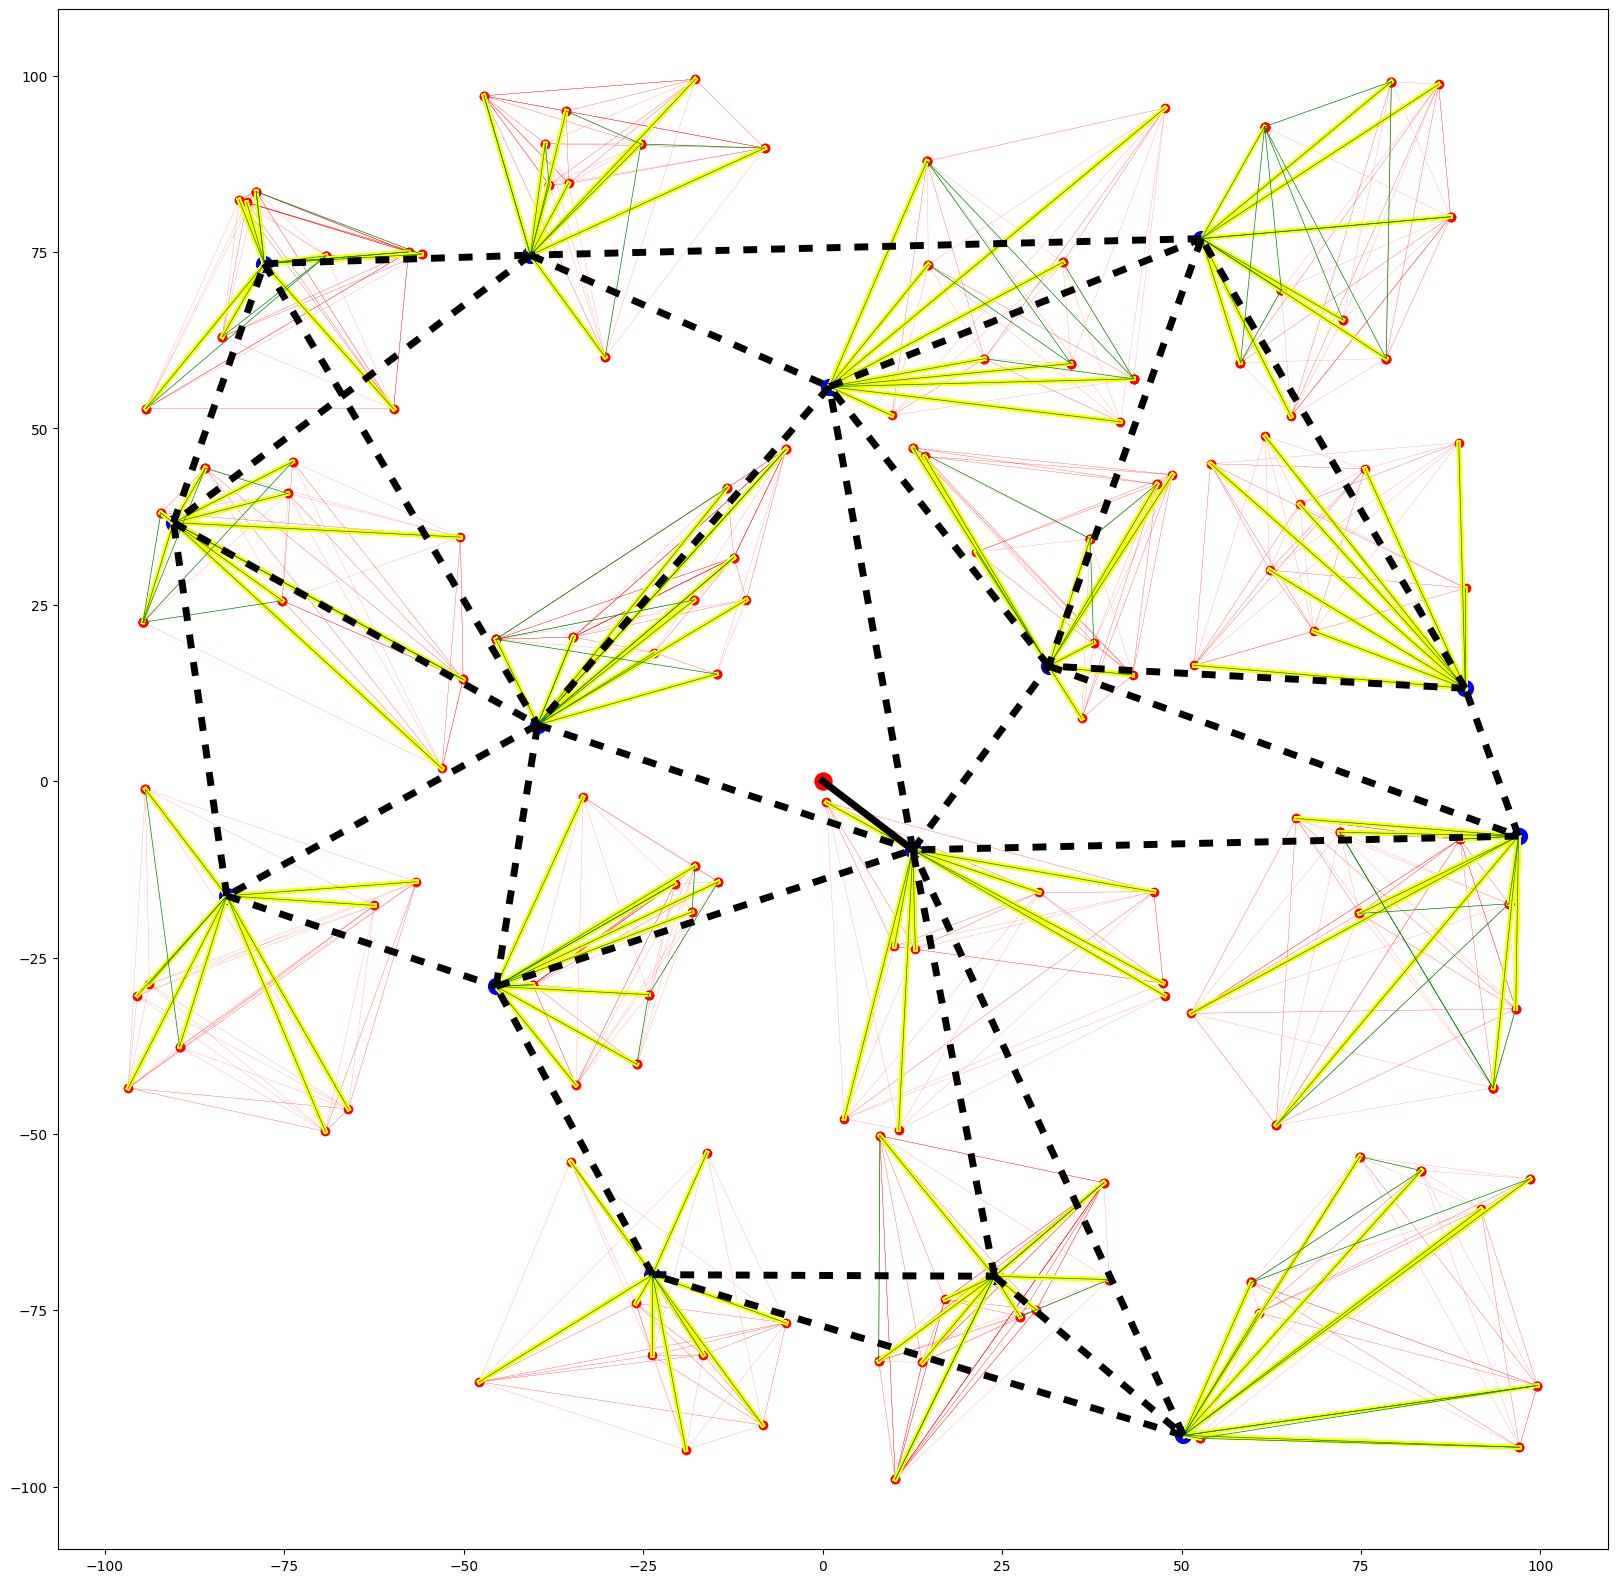

In [191]:
init_main_nodes_connected_to_central()

delete_cluster("cluster_1_1")
plt.figure(figsize = (20, 20))
print("Size of edges before deleting unnecessary edges in same cluster " + str(calculateNumOfEdges()))
delete_unnecessary_edges_in_clusters(main_nodes, edge_list_per_cluster)
draw_edges(edge_list_per_cluster)
print("Size of edges before deleting unnecessary edges in same cluster " + str(calculateNumOfEdges()))

draw_main_nodes(main_nodes)
closest_node = find_closest_node_to_central(main_nodes)
main_node_connected_to_central[closest_node] = True
connected_main_nodes = []   
connect_main_nodes(main_nodes)
connect_main_nodes(main_nodes)
recursively_set_other_nodes_as_connected_to_central(closest_node, main_node_connected_to_central, connected_main_nodes)
plt.scatter([central_node[0]], [central_node[1]], color = "red", s = 150)
# plt.scatter([neigbour[0]], [neigbour[1]], color = "green", s = 130)

for x in connected_main_nodes:
#     if x[1] != None:
        plt.plot([x[0][0], x[1][0]], [x[0][1], x[1][1]], lw = 5, color = "black", dashes = [2])
#         plt.scatter([x[0][0], x[1][0]], [x[0][1], x[1][1]])


for x in main_node_connected_to_central.keys():
    if main_node_connected_to_central[x] == True:
        plt.scatter([x[0]], [x[1]], color = "blue", s = 130)
        
fix_disconnected_main_nodes(connected_main_nodes, main_node_connected_to_central)

plt.plot([central_node[0], closest_node[0]], [central_node[1], closest_node[1]], lw = 5, color = "black")
plt.savefig("slika.png")

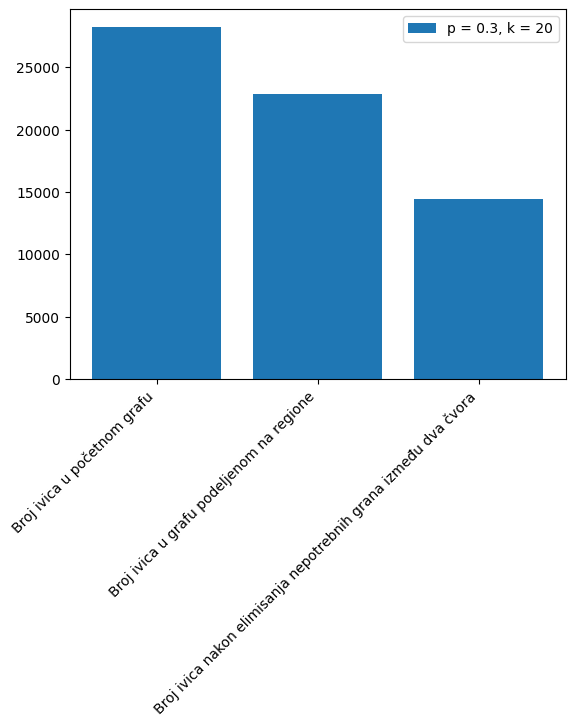

In [192]:
plt.bar(["Broj ivica u početnom grafu", "Broj ivica u grafu podeljenom na regione", "Broj ivica nakon elimisanja nepotrebnih grana između dva čvora"], [28214,22845,14450])
plt.legend(["p = 0.3, k = 20"])
plt.xticks(rotation=45, ha='right')
plt.savefig("extreme_bar")

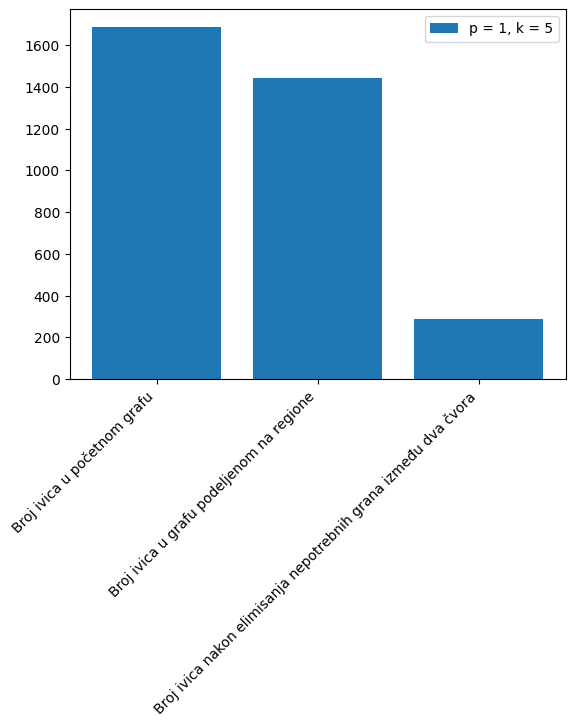

In [193]:
# plt.figure(figsize=(15, 15))
plt.bar(["Broj ivica u početnom grafu", "Broj ivica u grafu podeljenom na regione", "Broj ivica nakon elimisanja nepotrebnih grana između dva čvora"], [1686,1440,288])
plt.xticks(rotation=45, ha='right')
plt.legend(["p = 1, k = 5"])
plt.savefig("bar 1")

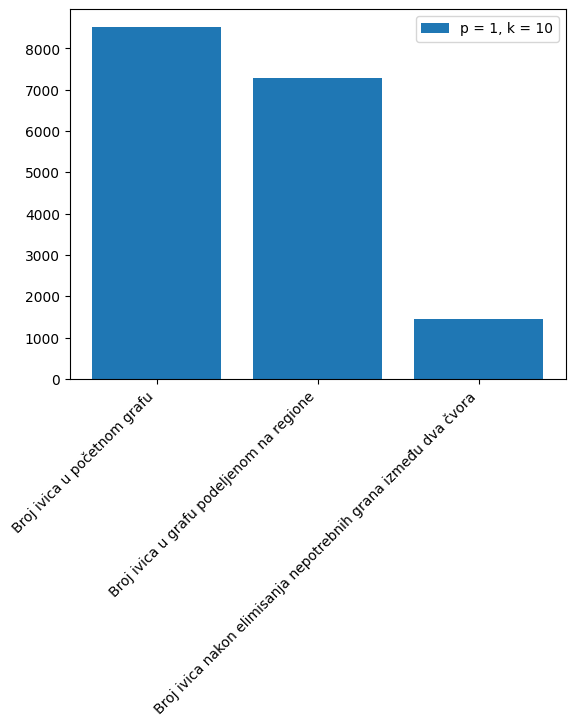

In [194]:
plt.bar(["Broj ivica u početnom grafu", "Broj ivica u grafu podeljenom na regione", "Broj ivica nakon elimisanja nepotrebnih grana između dva čvora"], [8518,7290,1458])
plt.xticks(rotation=45, ha='right')
plt.legend(["p = 1, k = 10"])
plt.savefig("bar 2")